In [1]:
import pandas as pd
from chart_studio import plotly 
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import plotly.offline as offline
from nltk.corpus import stopwords
from string import punctuation
import numpy as np
# from gensim import corpora, models, similarities
from nltk.tokenize import word_tokenize

In [112]:
# !pip install -U gensim

  Using cached gensim-3.8.3-cp36-cp36m-win_amd64.whl (24.2 MB)
  Using cached Cython-0.29.14-cp36-cp36m-win_amd64.whl (1.7 MB)
  Attempting uninstall: Cython
    Found existing installation: Cython 0.28.2
    Uninstalling Cython-0.28.2:


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\__pycache__\\cython.cpython-36.pyc'
Consider using the `--user` option or check the permissions.



In [1]:
# !pip --version

# Import Data

In [2]:
dataset = pd.read_csv('Data/ForTopicClustering.csv')

In [3]:
AllTweets = dataset[['Text', 'Date']]
AllTweets

,Text,Date
0,Man I tried. I had a gal lined up to join Mili...,2020-09-07 23:35:38+00:00
1,My grandmother requires 24/7 supervision due t...,2020-09-07 23:30:59+00:00
2,I know a doctor who told me that the flu shot ...,2020-09-07 23:27:03+00:00
3,They are doing an intervention for an obese wo...,2020-09-07 23:17:45+00:00
4,"I cry too, my 92 year old mum with advanced de...",2020-09-07 22:53:16+00:00
5,Now that covid has killed my mom I am going to...,2020-09-07 22:27:52+00:00
6,"I see that ""zero Covid strategy"" is now the bu...",2020-09-07 22:17:28+00:00
7,This shows the best analysis of the actual imp...,2020-09-07 21:58:13+00:00
8,"When they did get cases, they stopped all visi...",2020-09-07 21:46:50+00:00
9,this is me because of COVID dementia,2020-09-07 21:15:52+00:00


# Plot Count of Tweets/Day

In [86]:
# AllTweets['Time'] = AllTweets['Date'].split(' ')[0]
AllTweets['Time'] = [x.split(' ')[0] for x in AllTweets['Date']]
AllTweets

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,Text,Date,Time
0,@BullandFox Bull said today that Seaver died a...,2020-09-03 23:57:39+00:00,2020-09-03
1,The other day I had a senior patient with vasc...,2020-09-03 23:49:04+00:00,2020-09-03
2,Not sure yr humor is coming across but I also ...,2020-09-03 23:36:54+00:00,2020-09-03
3,National Baseball Hall of Fame pitcher Tom Sea...,2020-09-03 23:31:12+00:00,2020-09-03
4,Tom Seaver was diagnosed with dementia last ye...,2020-09-03 23:27:44+00:00,2020-09-03
5,He needs to be tested for COVID-19 but #JoeBid...,2020-09-03 23:25:13+00:00,2020-09-03
6,The grotesque propaganda is ubiquitous-ex.1mil...,2020-09-03 23:23:27+00:00,2020-09-03
7,Seaver was diagnosed with Lyme disease in 1991...,2020-09-03 23:20:04+00:00,2020-09-03
8,"Tom Seaver, a Hall of Fame pitcher who helped ...",2020-09-03 23:15:01+00:00,2020-09-03
9,He is old and has dementia if he gets COVID it...,2020-09-03 23:05:16+00:00,2020-09-03


In [64]:
# plotly.offline.init_notebook_mode()
tweetsT = pd.to_datetime(AllTweets['Time'], format='%Y-%m-%d')
# tweetsT = AllTweets['Time']

trace = go.Histogram(
    x=tweetsT,
    marker=dict(
        color='blue'
    ),
    opacity=0.75
)

layout = go.Layout(
    title='Tweet Activity Over Days',
    height=450,
    width=1000,
    xaxis=dict(
        title='Month and year'
    ),
    yaxis=dict(
        title='Tweet Quantity'
    ),
    bargap=0.2,
)

data = [trace]

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig)

# Plot Count of Tweets/Month

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



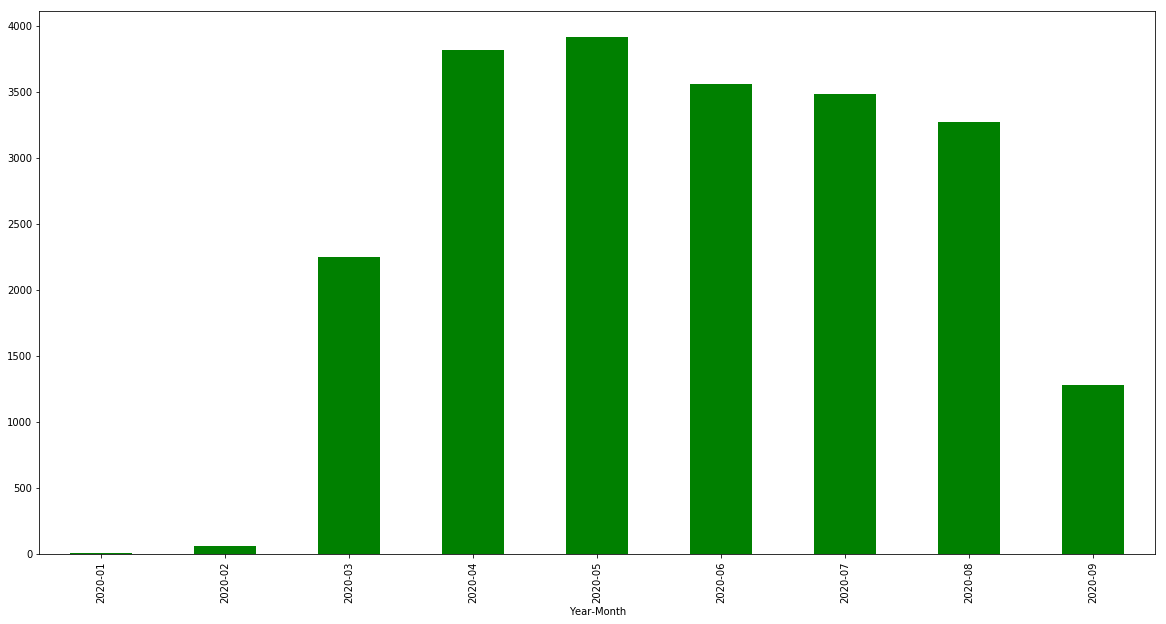

In [87]:
plt.figure(figsize=(20,10))
AllTweets['Year-Month'] = [x[:-3] for x in AllTweets['Time']]
AllTweets.groupby(['Year-Month'])['Year-Month'].count().plot(kind='bar', color='g')

In [63]:
# plotly.offline.init_notebook_mode()
tweetsT = pd.to_datetime(AllTweets['Year-Month'], format='%Y-%m')
# tweetsT = AllTweets['Time']

trace = go.Histogram(
    x=tweetsT,
    marker=dict(
        color='blue'
    ),
    opacity=0.75
)

layout = go.Layout(
    title='Tweet Activity Over Months',
    height=450,
    width=1000,
    xaxis=dict(
        title='Month and year'
    ),
    yaxis=dict(
        title='Tweet Quantity'
    ),
    bargap=0.2,
)

data = [trace]

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig)

# Data Preprocessing

## Remove duplicate tweets

In [4]:
print(len(AllTweets))
AllTweets.drop_duplicates(['Text'], inplace=True)
print(len(AllTweets))

14849
14849


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [91]:
http.iloc[ 8  , : ]['Text']

'The passing of ‘Fresno’s icon’: Hall of Famer Tom Seaver dies from dementia, COVID-19 https://trib.al/DZfEFEh'

## Lowercase the tweets

In [7]:
AllTweets['Text'] = [x.lower() for x in AllTweets['Text']]
AllTweets

,Text,Date
0,man i tried. i had a gal lined up to join mili...,2020-09-07 23:35:38+00:00
1,my grandmother requires 24/7 supervision due t...,2020-09-07 23:30:59+00:00
2,i know a doctor who told me that the flu shot ...,2020-09-07 23:27:03+00:00
3,they are doing an intervention for an obese wo...,2020-09-07 23:17:45+00:00
4,"i cry too, my 92 year old mum with advanced de...",2020-09-07 22:53:16+00:00
5,now that covid has killed my mom i am going to...,2020-09-07 22:27:52+00:00
6,"i see that ""zero covid strategy"" is now the bu...",2020-09-07 22:17:28+00:00
7,this shows the best analysis of the actual imp...,2020-09-07 21:58:13+00:00
8,"when they did get cases, they stopped all visi...",2020-09-07 21:46:50+00:00
9,this is me because of covid dementia,2020-09-07 21:15:52+00:00


# Remove stopwords and punctuation

In [10]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mahsa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
corpus = AllTweets['Text'].tolist()
tokenizer = nltk.RegexpTokenizer(r"\w+")
# nopunc = tokenizer.tokenize(raw_text)
# word_tokens = word_tokenize(AllTweets['Text'].tolist()[0])
# word_tokens
# text = word_tokenize("The quick brown fox jumps over the lazy dog")
# text
numbers = '1234567890'
stoplist = stopwords.words('english') + list(punctuation) + list(numbers)

texts = [[word for word in tokenizer.tokenize(str(document)) if word not in stoplist] for document in corpus]

In [19]:
texts[8]

['get',
 'cases',
 'stopped',
 'visits',
 'including',
 'via',
 'window',
 'mom',
 'dementia',
 'advanced',
 'full',
 'month',
 'visits',
 'get',
 'words',
 'largely',
 'oblivious',
 'seriousness',
 'covid',
 'thinks',
 'leave']

In [14]:
AllTweets['Text'].tolist()[8]

'when they did get cases, they stopped all visits, including via window. mom’s dementia has advanced. that was about a full month of no visits. she doesn’t get more than a few words out. she’s largely oblivious to the seriousness of covid and thinks she’ll leave.'

In [15]:
word_tokens = word_tokenize(AllTweets['Text'].tolist()[8])
word_tokens

['when',
 'they',
 'did',
 'get',
 'cases',
 ',',
 'they',
 'stopped',
 'all',
 'visits',
 ',',
 'including',
 'via',
 'window',
 '.',
 'mom',
 '’',
 's',
 'dementia',
 'has',
 'advanced',
 '.',
 'that',
 'was',
 'about',
 'a',
 'full',
 'month',
 'of',
 'no',
 'visits',
 '.',
 'she',
 'doesn',
 '’',
 't',
 'get',
 'more',
 'than',
 'a',
 'few',
 'words',
 'out',
 '.',
 'she',
 '’',
 's',
 'largely',
 'oblivious',
 'to',
 'the',
 'seriousness',
 'of',
 'covid',
 'and',
 'thinks',
 'she',
 '’',
 'll',
 'leave',
 '.']

In [16]:
word_tokens = tokenizer.tokenize(AllTweets['Text'].tolist()[8])
word_tokens

['when',
 'they',
 'did',
 'get',
 'cases',
 'they',
 'stopped',
 'all',
 'visits',
 'including',
 'via',
 'window',
 'mom',
 's',
 'dementia',
 'has',
 'advanced',
 'that',
 'was',
 'about',
 'a',
 'full',
 'month',
 'of',
 'no',
 'visits',
 'she',
 'doesn',
 't',
 'get',
 'more',
 'than',
 'a',
 'few',
 'words',
 'out',
 'she',
 's',
 'largely',
 'oblivious',
 'to',
 'the',
 'seriousness',
 'of',
 'covid',
 'and',
 'thinks',
 'she',
 'll',
 'leave']

In [21]:
corpus

['man i tried. i had a gal lined up to join military intelligence then covid hit, they delayed her enlistment, her army nurse sister talked her out of it. so i’m chipping in to help her finish her bsn while she works at a dementia care facility. she’ll be an amazing nurse i’m sure.',
 "my grandmother requires 24/7 supervision due to her dementia. the healthcare worker who is supposed to assist this evening just got back from out of state travel to a large funeral. the coordinating care facility's response to our concern is that you can catch covid anywhere. 🙄",
 'i know a doctor who told me that the flu shot causes dementia. and, if we let them jab us once for covid, this allowance could turn into a mandated, yearly, adult vaccine.',
 'they are doing an intervention for an obese women that covid would love to invade and a senior with dementia. how did the intervention work out @richhiggins_dc ?',
 'i cry too, my 92 year old mum with advanced dementia, i’ve not seen since sept. my famil

In [20]:
texts

[['man',
  'tried',
  'gal',
  'lined',
  'join',
  'military',
  'intelligence',
  'covid',
  'hit',
  'delayed',
  'enlistment',
  'army',
  'nurse',
  'sister',
  'talked',
  'chipping',
  'help',
  'finish',
  'bsn',
  'works',
  'dementia',
  'care',
  'facility',
  'amazing',
  'nurse',
  'sure'],
 ['grandmother',
  'requires',
  '24',
  'supervision',
  'due',
  'dementia',
  'healthcare',
  'worker',
  'supposed',
  'assist',
  'evening',
  'got',
  'back',
  'state',
  'travel',
  'large',
  'funeral',
  'coordinating',
  'care',
  'facility',
  'response',
  'concern',
  'catch',
  'covid',
  'anywhere'],
 ['know',
  'doctor',
  'told',
  'flu',
  'shot',
  'causes',
  'dementia',
  'let',
  'jab',
  'us',
  'covid',
  'allowance',
  'could',
  'turn',
  'mandated',
  'yearly',
  'adult',
  'vaccine'],
 ['intervention',
  'obese',
  'women',
  'covid',
  'would',
  'love',
  'invade',
  'senior',
  'dementia',
  'intervention',
  'work',
  'richhiggins_dc'],
 ['cry',
  '92',


In [105]:
dictionary = corpora.Dictionary(texts)
dictionary

NameError: name 'corpora' is not defined